In [1]:
!pip install python-binance
!pip install yfinance
!pip install mplfinanc

ERROR: Could not find a version that satisfies the requirement mplfinanc (from versions: none)
ERROR: No matching distribution found for mplfinanc


In [2]:
import ssl
import time
import json
import re
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from IPython.display import clear_output
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client
import traceback
# from numba import prange
from IPython.display import display, HTML
from scipy.signal import argrelextrema
import hmac, hashlib, urllib, requests, time
from scipy.signal import argrelextrema
from numpy import array as np_array
import matplotlib.pyplot as plt
from numpy import less, greater
from datetime import datetime
from pandas import DataFrame  
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [3]:
class Binance():
    methods = {
        # public methods
        'ping': {'url': 'api/v1/ping', 'method': 'GET', 'private': False},
        'time': {'url': 'api/v1/time', 'method': 'GET', 'private': False},
        'exchangeInfo': {'url': 'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
        'depth': {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
        'trades': {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
        'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
        'aggTrades': {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
        'klines': {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
        'ticker24hr': {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
        'tickerPrice': {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
        'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
        # private methods
        'createOrder': {'url': 'api/v3/order', 'method': 'POST', 'private': True},
        'testOrder': {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
        'orderInfo': {'url': 'api/v3/order', 'method': 'GET', 'private': True},
        'cancelOrder': {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
        'openOrders': {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
        'allOrders': {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
        'account': {'url': 'api/v3/account', 'method': 'GET', 'private': True},
        'myTrades': {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
        # wapi
        'depositAddress': {'url': 'wapi/v3/depositAddress.html', 'method': 'GET', 'private': True},
        'withdraw': {'url': 'wapi/v3/withdraw.html', 'method': 'POST', 'private': True},
        'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method': 'GET', 'private': True},
        'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method': 'GET', 'private': True},
        'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method': 'GET', 'private': True},
        'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method': 'GET', 'private': True},
        'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method': 'GET', 'private': True},
        'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method': 'GET', 'private': True},
        'assetDust': {'url': 'sapi/v1/asset/dust', 'method': 'POST', 'private': True},
        'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method': 'GET', 'private': True},
        'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method': 'GET', 'private': True},
        # sapi
        'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private': True},
        'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
        'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
        'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
        'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
        'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private': True},
        'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private': True},
        'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private': True},
        'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private': True},
        'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private': True},
        'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private': True},
        'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private': True},
        'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private': True},
        'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private': True},
        'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private': True},
        'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private': True},
        'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private': True},
        # futures
        'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
        'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
        'futuresCreateOrder': {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
        'futuresAccount': {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
        'futuresBalance': {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
        'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
        'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
        'futuresCancelOrder': {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
        'futuresPrice': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
        'futuresDepth': {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
        'futuresAllOrders': {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
        'futuresOpenOrders': {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
    }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)

        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url = 'https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature=" + str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type": "application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url,
                                    data="" if self.methods[command]['method'] == 'GET' else payload_str,
                                    headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()


bot = Binance(
    API_KEY='5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
    API_SECRET='XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'
)


def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY=api_keys['apikey'], API_SECRET=api_keys['apisecret']))
    return clients

In [4]:
_API_LIST_ = [
    {'apikey': 'EvnNm9TKqsC2p48HsCdApx7c0UHgFLXByOL6hPjWIKeLS8TvOifSvZnqEa6mniWI',
     'apisecret': 'r1j02rVBir11OKOVeiPe2LvJ8klDC6bm3NSjNfNJSMKkwiTHc6iix2om4fbsIaOf'},
    {'apikey': '5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
     'apisecret': 'XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'},
    {'apikey': 'XEWksNXgijYkBfokp9Nnq2aBbS8VtaKRBXr15bebFAUx99q2KI2xhi75NNM7yms4',
     'apisecret': 'fUO81kg0bKL4Ig1p7kqih2eW25XjnGD0soPTUbMt2riMZv0YAr1LDoPeynJENcA7'},
    {'apikey': 'LbsKC75PVp12pPaxpUzctmO5IxIEUdX3bLqpQAbkzslFwbL2c64Mt4sJUjqQMSgr',
     'apisecret': 'ScyapZew18D8cTncyrVocaBevr4M0WPmBG8K0ACgJ2XFCDMxevItzQdS9VN2uYmC'},
    {'apikey': 'PWUrujIHQsQPMlm2nTQwAwqDy3eVVFpXQJ8jOWbEBnqjhoSGCr5F1m2rYUDRWaSY',
     'apisecret': 'SMtNYX9fg3fEPZUuKYhHHKB3mbatfH7WwjqblmKuItglTKlou0XJR607tccoXFyu'},
    {'apikey': 'mkPWLpmy8MCDvx1xiZzRaHwkz8MlYyYQynHcsKCbnNsCLG4IUv2RK03ndPrJKT3B',
     'apisecret': 'TWtchKvd32ok72kJddHRmllaX4x8Ad2PmInIKHkRZgV3YDj6YjJSzYXosedUh1AU'},
    {'apikey': '5JJHdFEUAflZNKxvPXYgLfsMiGPxjxKlYD4HEMx5aihaRBgAETw4rV0jnAEGm5dh',
     'apisecret': 'T5R22DoslDUbN7ORjML3sRLR6lSzm5I3SwXaErhT5MbdCMe4NpIJbF7kGrsacl0T'},
    {'apikey': 'Iq1xfyElTdk3velugqvaVp1aiAWbAcxyQLs2DzHJySTZCNeMQP243tiQGdoUhCl7',
     'apisecret': '8zKsD55iPxy5ND6AFukxEUqK8PcMLatdXG7scG8HWgomPBQOtRoZSFvjALgrT3Ew'},
    {'apikey': 'Iab3YDpTeSLo9xSMSLKnoZStZ1R23uVn4eikCrelCgtzPytVfHSMPZPB6woXQJuF',
     'apisecret': 'hxjOl74MI6UAA3WyTa8hcWjenFS3kKa5IkYNzM9r5DHCyjE3a0gXhqLZJGP4kcG3'},
    {'apikey': 'UQrazVFv3aAOdd6zCyRf5RvjjQRrxUBg3qxy7t8Eru9qkQdDGYUhiYergXqOxe9g',
     'apisecret': 'n5uXrojJxtyI5xq8L7IHAPCFx4ldYy1z4hcoY4tzf3Od74e9NJCDV00WPmyZcyxG'},
    {'apikey': 'lzarzgM9sE6qbUove5X0Gqu9lQn7HNz820GF6ZgeqKRNEmjmBUZYOYQlMWtLuj1q',
     'apisecret': 'Q8CxToI8rk6DJMlesarKxLDs8w3TH6XqhSaguJaL60BnRxzapgbKhXEJzrxvK4fW'},
    {'apikey': '7RHAc0yqJGTSGbnxIiZZa1xm9YKxa0gFpJU0bkcSaGn2OaaWm9xfdhPbNRa2A8sS',
     'apisecret': 'paJc7wlu34QGufetvR77WQDblHzhHYgA8NX8m6tpkwU3xW2ssJ2q7ODxNI3TcjUv'},
    {'apikey': 'pZ1trU1ahK8fcykT29rpkATMT4sTdFQgGzruqLW09g4c4bsveYRF8sANpgc78Gz9',
     'apisecret': 'pWOT5QrGJ8dcYdXChL3aMyG1GPVxtC5zxmTXFPEvRpl9Vyrmrt0hUqcelDkKYY2d'}
]

In [5]:
coin_list = []
full_coin_list = []
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    full_coin_list.append(s['symbol'])
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [6]:
new_coin_list = []
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent']) > 6 or float(vol['priceChangePercent']) < -6:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['TRXUSDT', 'ETCUSDT', 'NEOUSDT', 'KNCUSDT', 'ZRXUSDT', 'DOGEUSDT', 'KAVAUSDT']


In [7]:
_LIMIT_ = 1000
_SYMBOL_ = 'DOGEUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [8]:
def TimeNow():
    now = datetime.now()
    return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
    return datetime.utcfromtimestamp(inputTime / 1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
    a = True
    while a:
        time.sleep(0.1)
        _timenow_ = str(TimeNow()).split(":")
        _timenow_ = _timenow_[len(_timenow_) - 1]
        if int(_timenow_) % 5 == 0:
            a = False

def TimeStampNow():
    return time.time()

def check(a, b):
    for i in a:
        if b == i:
            return True
    return False

def MinetsTimestamp(minets):
    return minets * 60 * 1000

def TimestampToNormal(inputTime):
    return datetime.utcfromtimestamp(inputTime / 1000).strftime('%Y-%m-%d %H:%M:%S')

def NormalToTimestamp(inputTime):
    return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp() * 1000)

def klines_parsing(_klines_):
    _klines_final_ = []

    for _i_ in _klines_:
        _klines_final_.append({
            "Open time": TimestampToNormal(_i_[0] + 60 * 60 * 3 * 1000),
            "Open": float(_i_[1]),
            "High": float(_i_[2]),
            "Low": float(_i_[3]),
            "Close": float(_i_[4]),
            "Volume": float(_i_[5]),
            "Close time": TimestampToNormal(_i_[6] + 60 * 60 * 3 * 1000),
            "Quote asset volume": _i_[7],
            "Number of trades": _i_[8],
            "Taker buy base asset volume": _i_[9],
            "Taker buy quote asset volume": _i_[10],
            "Ignore": _i_[11]
        })
    return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close, close_max, close_min = [], [], []
df = pd.read_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv')
_MINETS_ = 60
_INTERVAL_ = "15m"
klines_bd = pd.DataFrame([], columns=['Date', 'Open', 'High', 'Low', 'Close', 'Data_new'])
startTime = NormalToTimestamp(df.iloc[0]['Data_new']) + 60000 * int(re.findall(r'\d+', _INTERVAL_)[0])
endTime = NormalToTimestamp(TimeNow())
print(1)
for i in range(int(np.ceil(((endTime - startTime) / 30000000)))):
    _klines_ = bot.futuresKlines(
        symbol=_SYMBOL_,
        interval=_INTERVAL_,
        startTime=startTime + 30000000 * i,
        endTime=endTime
    )
    _klines_ = klines_parsing(_klines_)
    for i in _klines_:
        klines_bd.loc[len(klines_bd.index)] = [i['Open time'][:10], i['Open'], i['High'], i['Low'], i['Close'],
                                               i['Open time']]
    for i in _klines_:
        close_max.append(i['High'])
        close_min.append(i['Low'])
frames = [klines_bd.iloc[::-1], df]
df = pd.concat(frames)
df_klines_start = df
df.to_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv', index=False)
print(2)
levels_full = []

df = df.set_index('Data_new')
df['Data_new'] = pd.to_datetime(df.index)
df['Data_new'] = df['Data_new'].apply(mpl_dates.date2num)
df = df.set_index('Date')
df = df.rename(columns={"Data_new": "Date"})
df = df[['Date', 'Open', 'High', 'Low', 'Close']]


# метод 1: фрактальная свеча
# определение бычьего фрактала  
def is_support(df, i):
    cond1 = df['Low'][i] < df['Low'][i - 1]
    cond2 = df['Low'][i] < df['Low'][i + 1]
    cond3 = df['Low'][i + 1] < df['Low'][i + 2]
    cond4 = df['Low'][i - 1] < df['Low'][i - 2]
    return (cond1 and cond2 and cond3 and cond4)


# определение медвежьего фрактал 
def is_resistance(df, i):
    cond1 = df['High'][i] > df['High'][i - 1]
    cond2 = df['High'][i] > df['High'][i + 1]
    cond3 = df['High'][i + 1] > df['High'][i + 2]
    cond4 = df['High'][i - 1] > df['High'][i - 2]
    return (cond1 and cond2 and cond3 and cond4)


# чтобы проверить, что область нового уровня еще не существует
def is_far_from_level(value, levels, df):
    ave = np.mean(df['High'] - df['Low'])
    return np.sum([abs(value - level) < ave for _, level in levels]) == 0


# список для хранения уровней сопротивления и поддержки
levels = []
for i in range(2, df.shape[0] - 2):
    if is_support(df, i):
        low = df['Low'][i]
        if is_far_from_level(low, levels, df):
            levels.append((i, low))
    elif is_resistance(df, i):
        high = df['High'][i]
        if is_far_from_level(high, levels, df):
            levels.append((i, high))

for i in levels:
    levels_full.append(i[1])
levels_full = set(levels_full)
print(len(levels_full))
levels_full

1
2
87


{0.05258,
 0.05638,
 0.05678,
 0.05721,
 0.0581,
 0.05859,
 0.05908,
 0.05961,
 0.0602,
 0.06065,
 0.06114,
 0.06167,
 0.0624,
 0.06284,
 0.06331,
 0.06389,
 0.06459,
 0.06503,
 0.06543,
 0.06583,
 0.06659,
 0.06713,
 0.06789,
 0.06851,
 0.06903,
 0.06972,
 0.07025,
 0.07087,
 0.07136,
 0.072,
 0.0724,
 0.0728,
 0.0732,
 0.0738,
 0.07443,
 0.07505,
 0.07564,
 0.07614,
 0.07658,
 0.07701,
 0.07746,
 0.07787,
 0.07829,
 0.07868,
 0.07912,
 0.07979,
 0.08024,
 0.08062,
 0.08133,
 0.08173,
 0.08227,
 0.08275,
 0.08313,
 0.08387,
 0.08463,
 0.08501,
 0.08543,
 0.08581,
 0.08638,
 0.08679,
 0.08723,
 0.08761,
 0.08804,
 0.08868,
 0.08932,
 0.08974,
 0.09022,
 0.09079,
 0.09128,
 0.09206,
 0.09266,
 0.09312,
 0.09353,
 0.09425,
 0.09477,
 0.09531,
 0.0962,
 0.09659,
 0.09705,
 0.0978,
 0.09818,
 0.09883,
 0.09921,
 0.09976,
 0.10074,
 0.10199,
 0.10372}

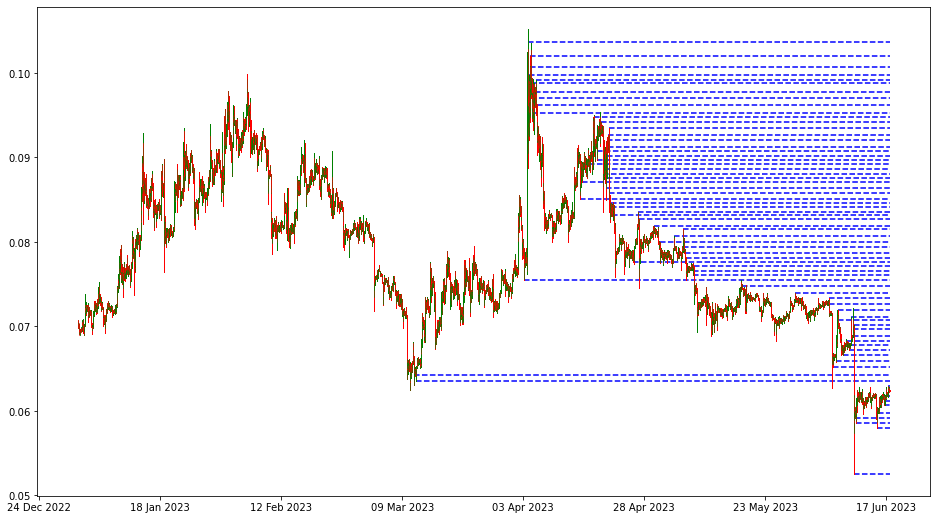

In [44]:
# для визуализаций
def plot_all(levels, df):
    fig, ax = plt.subplots(figsize=(16, 9))
    candlestick_ohlc(ax, df.values, width=0.007, colorup='green',
                     colordown='red', alpha=0.8)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    for level in levels:
        plt.hlines(level[1], xmin=df['Date'][level[0]], xmax=
        max(df['Date']), colors='blue', linestyle='--')
    fig.show()


plot_all(levels, df)

In [9]:
pd.set_option('display.max_colwidth', 0)

df = pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный', 'Заработали с сделки'])
df_error = pd.DataFrame([], columns=['Время ошибки', 'Тип и место ошибки'])

In [186]:
def out_red(text):
    print("\033[31m {}".format(text))
def out_green(text):
    print("\033[32m {}".format(text))
def out_yellow(text):
    print("\033[33m {}".format(text))
def out_blue(text):
    print("\033[34m {}".format(text))
def out_black(text):
    print("\033[30m {}".format(text))
def out_turquoise(text):
    print("\033[36m {}".format(text))
def wrap_df_text(df):
    return display(HTML(df.to_html().replace("\\n", "<br>")))

def nearest_value(items, fuchers_last_price, type_found):
    max_list = []
    min_list = []
    for item in items:
        # для поиска цены больше текущей
        if type_found == 'больше':
            if item > fuchers_last_price:
                max_list.append(item)
        # для поиска цены меньше текущей
        if type_found == 'меньше':
            if item < fuchers_last_price:
                min_list.append(item)
    if type_found == 'меньше':
        return max(min_list)
    if type_found == 'больше':
        return min(max_list)

def end_zeros(n):
    d = str(n)
    count = 0
    for i in d[len(d):0:-1]:
        if i == '0':
            count += 1
        else:
            break
    return count

def glass_parser(glass, number):
    for en1, i in enumerate(glass):
        if str(number) in i:
            break
    return en1, i

def find_dict(value, seq, where):
    for index, item in enumerate(seq):
        if item[where] == value:
            return (index)
            break

def find_list(value, seq):
    for index, item in enumerate(seq):
        if value in item:
            return index, item

def open_value_monitor(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, types,
                       parts_left, new_glass):
    global earn_for_cycle
    global is_cycle_break
    new_glass_count = float(glass_parser(new_glass, start_futures)[1][1])
    if start_futures == fuchers_last_price and new_glass_count < old_glass_count:
        if types == 1:
            earn_for_cycle = profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)
            is_cycle_break = True
        elif types == 2:
            earn_for_cycle = profit_calculate_for_cycle(start_futures, end, lots_part * parts_left, taker, maker)
            is_cycle_break = True


def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit = (float(reduced) * lots - float(deductible) * lots + float(profit)) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots)
    return profit

def profit_calculate_for_cycle(reduced, deductible, lots, taker, maker):
    profit = (float(reduced) * lots - float(deductible) * lots) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, taker, maker):
    start_sum = (float(reduced) * lots - float(deductible) * lots) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots) + start_sum
    return start_sum

def max_min_building(_INTERVAL_, levels_full, df_klines_start):
    df_klines_start = pd.read_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv')
    klines_bd = pd.DataFrame([], columns=['Date', 'Open', 'High', 'Low', 'Close', 'Data_new'])
    startTime = NormalToTimestamp(df_klines_start.iloc[0]['Data_new']) + 60000 * int(re.findall(r'\d+', _INTERVAL_)[0])
    endTime = NormalToTimestamp(TimeNow())
    # for i in range(1, 37):
    #     print(round(i/37*100,2),'%',TimestampToNormal(TimestampNow - MinetsTimestamp(_MINETS_*i)), TimestampToNormal(TimestampNow - MinetsTimestamp(_MINETS_*(i-1))))
    for i in range(int(np.ceil(((endTime - startTime) / 30000000)))):
        _klines_ = bot.futuresKlines(
            symbol=_SYMBOL_,
            interval=_INTERVAL_,
            startTime=startTime + 30000000 * i,
            endTime=endTime
        )
        _klines_ = klines_parsing(_klines_)
        for i in _klines_:
            klines_bd.loc[len(klines_bd.index)] = [i['Open time'][:10], i['Open'], i['High'], i['Low'], i['Close'],
                                                   i['Open time']]
        for i in _klines_:
            close_max.append(i['High'])
            close_min.append(i['Low'])
    frames = [klines_bd.iloc[::-1], df_klines_start]
    df_klines_start = pd.concat(frames)
    df_klines_start.to_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv', index = False)
    df_klines = df_klines_start.copy()  # klines_bd

    df_klines = df_klines.set_index('Data_new')
    df_klines['Data_new'] = pd.to_datetime(df_klines.index)
    df_klines['Data_new'] = df_klines['Data_new'].apply(mpl_dates.date2num)
    df_klines = df_klines.set_index('Date')
    df_klines = df_klines.rename(columns={"Data_new": "Date"})
    df_klines = df_klines[['Date', 'Open', 'High', 'Low', 'Close']]

    def is_support(df, i):
        cond1 = df['Low'][i] < df['Low'][i - 1]
        cond2 = df['Low'][i] < df['Low'][i + 1]
        cond3 = df['Low'][i + 1] < df['Low'][i + 2]
        cond4 = df['Low'][i - 1] < df['Low'][i - 2]
        return (cond1 and cond2 and cond3 and cond4)
        # определение медвежьего фрактал

    def is_resistance(df, i):
        cond1 = df['High'][i] > df['High'][i - 1]
        cond2 = df['High'][i] > df['High'][i + 1]
        cond3 = df['High'][i + 1] > df['High'][i + 2]
        cond4 = df['High'][i - 1] > df['High'][i - 2]
        return (cond1 and cond2 and cond3 and cond4)

    # чтобы проверить, что область нового уровня еще не существует
    def is_far_from_level(value, levels, df):
        ave = np.mean(df['High'] - df['Low'])
        return np.sum([abs(value - level) < ave for _, level in levels]) == 0

    # список для хранения уровней сопротивления и поддержки
    levels = []
    for i in range(2, df_klines.shape[0] - 2):
        if is_support(df_klines, i):
            low = df_klines['Low'][i]
            if is_far_from_level(low, levels, df_klines):
                levels.append((i, low))
        elif is_resistance(df_klines, i):
            high = df_klines['High'][i]
            if is_far_from_level(high, levels, df_klines):
                levels.append((i, high))
    new_levels = []
    for i in levels:
        new_levels.append(i[1])
    levels_full = set(list(levels_full) + list(new_levels))

    return levels_full


def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum,
                     maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit,
                     change_for_new_stop_loss, nearest_bids, mean_for_rebound):  # Пробой asks и отcкок bids
    global earn_for_cycle
    global is_cycle_break
    new_stop_loss = stop_loss
    true_answeres_after = []
    is_cycle_break = False
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker + taker
    part_of_take_profit = lots / parts
    parts_left = parts
    gap_take = (take_profit - commission_costs) / parts
    lots_part = lots / parts
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
    time_start = TimeNow()
    out_blue(f'Работаем на {breakdown_rebound} buy {type_operation} {start_futures}')
    print(f' Время  открытия сделки {TimeNow()}')
    while True:
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
#         spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])

        if fuchers_last_price >= start_futures * (1 + take_profit * change_for_new_stop_loss):
            # new_stop_loss = -(commission_costs*1.5)
            new_stop_loss = -0.001

        if (fuchers_last_price < start_futures * (1 - stop_loss)) or (
                fuchers_last_price < start_futures * (1 - new_stop_loss) or (
                breakdown_rebound == 'отскок' and fuchers_last_price >= nearest_bids and float(
                find_list(str(nearest_bids).ljust(8, '0'), glass['bids'])[1][1]) <= mean_for_rebound * 0.8)):
            end = fuchers_last_price
            end_time = TimeNow()
            earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part * parts_left, taker, maker)
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle]
            print(' Время  закрытия сделки', TimeNow())
            break

        if fuchers_last_price > start_futures * (1 + (commission_costs + gap_take * number_take)):
            end = fuchers_last_price
            parts_left -= 1
            number_take += 1
            earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)

        if parts_left == 0:
            end = fuchers_last_price
            end_time = TimeNow()
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle]
            print(' Время  закрытия сделки', TimeNow())
            break
    print(' За цикл заработали/потеряли', earn_for_cycle)
    print(' ###########################################################################')
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer


def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum,
                     maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit,
                     change_for_new_stop_loss, nearest_asks, mean_for_rebound):  # Пробой bids и отcкок asks
    global earn_for_cycle
    global is_cycle_break
    true_answeres_after = []
    is_cycle_break = False
    new_stop_loss = stop_loss
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker + taker
    part_of_take_profit = lots / parts
    parts_left = parts
    gap_take = (take_profit - commission_costs) / parts
    lots_part = lots / parts
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
    time_start = TimeNow()
    out_blue(f'Работаем на {breakdown_rebound} buy {type_operation} {start_futures}')
    print(f' Время  открытия сделки {TimeNow()}')
    while True:
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
#         spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])

        if fuchers_last_price <= start_futures * (
                1 - take_profit * change_for_new_stop_loss):  # fuchers_last_price <= start_futures*(1+take_profit*change_for_new_stop_loss)
            new_stop_loss = -0.001

        if fuchers_last_price < start_futures * (1 - (commission_costs + gap_take * number_take)):
            end = fuchers_last_price
            parts_left -= 1
            number_take += 1
            earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)

        if (fuchers_last_price > start_futures * (1 + stop_loss)) or (
                fuchers_last_price > start_futures * (1 + new_stop_loss) or (
                breakdown_rebound == 'отскок' and fuchers_last_price <= nearest_asks and float(
                find_list(str(nearest_asks).ljust(8, '0'), glass['asks'])[1][1]) <= mean_for_rebound * 0.8)):
            end = fuchers_last_price
            end_time = TimeNow()
            earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part * parts_left, taker, maker)
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle]
            print(' Время  закрытия сделки', TimeNow())
            break

        if parts_left == 0:
            end = fuchers_last_price
            end_time = TimeNow()
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle]
            print(' Время  закрытия сделки', TimeNow())
            break

    print(' За цикл заработали/потеряли', earn_for_cycle)
    print(' ###########################################################################')
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer

In [195]:
df = pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода',
                               'Время выхода', 'Правильный Неправильный', 'Заработали с сделки'])
df_error = pd.DataFrame([], columns=['Время ошибки', 'Тип и место ошибки'])

In [199]:
iteration = 0
profit = 0
start_sum = 10000
how_more_mean_vol_for_rebound_bids = 15
how_more_mean_vol_for_rebound_asks = 15  # Можно потом поменять на 6.5 или 7
how_more_mean_vol_for_rebound_dollar = 200000
how_more_mean_vol_for_breakdown = 15
number_in_info = find_list(_SYMBOL_, full_coin_list)[0]
price_precision = int(bot.futuresExchangeInfo()['symbols'][number_in_info]['pricePrecision'])
tick_size = float(bot.futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
fuchers_last_price = float(bot.futuresPrice(symbol=_SYMBOL_)['price'])
gap = 8  # 7 или 15
gap_2 = 3  # 5 или 10
gap_for_min_max = 3
change_for_new_stop_loss = 0.55
parts = 7
stop_loss = round(gap * tick_size / fuchers_last_price, 5)  # 0.0015
take_profit = 0.005  # 0.0015
right_answer = 0
false_answer = 0
bot_number = 0
maker = 0.000162
taker = 0.000324
close_max_copy = close_max.copy()
close_min_copy = close_min.copy()
BOT_LIST = client_create(_API_LIST_)
before_price = klines_parsing(bot.futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']
tick_size = float(bot.futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
full_bids = []
full_asks = []
zero_list = []
fuchers_last_price_list = []
# wrong_time = [1, 5, 6, 7, 8, 9, 21]
wrong_time = [21, 22]
max_min = list(levels_full)
# bids = []
# asks = []

while True:
    try:
        bids = []
        asks = []
        is_nearest_bids_in_nearest_close_min_list = False
        is_nearest_asks_in_nearest_close_max_list = False
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
        #list(map(glass.pop, ['lastUpdateId', 'E', 'T']))
        bids_asks_list_vol = []
        close_max_min_list_vol = []
        new_glass = glass['bids'] + glass['asks']

        zero_list = [i[0] for i in new_glass if end_zeros(i[0]) >= 2]
#         for i in new_glass:
#             if end_zeros(i[0]) >= 2:
#                 zero_list.append(float(i[0]))
                
        bids_asks_list_vol = [j[1] for j in new_glass]
#         for j in glass['bids']:
#             bids_asks_list_vol.append(j[1])
#         for z in glass['asks']:
#             bids_asks_list_vol.append(z[1])

        bids_asks_list_vol = np.array(bids_asks_list_vol).astype(np.float)

        mean_for_rebound_bids = np.mean(bids_asks_list_vol) * how_more_mean_vol_for_rebound_bids
        mean_for_rebound_asks = np.mean(bids_asks_list_vol) * how_more_mean_vol_for_rebound_asks

        bids = [u[0] for u in glass['bids'] if float(u[1]) >= mean_for_rebound_bids]
        asks = [f[0] for f in glass['asks'] if float(f[1]) >= mean_for_rebound_asks]        
#         for u in glass['bids']:
#             if float(u[1]) >= mean_for_rebound_bids:
#                 bids.append(u[0])
#         for f in glass['asks']:
#             if float(f[1]) >= mean_for_rebound_asks:
#                 asks.append(f[0])

            #         if int(TimeNow()[17:19]) >= 20 and int(TimeNow()[17:19]) <= 25:
        #             before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']

        if (TimeNow()[14:16] == '30' and int(TimeNow()[17:19]) >= 0 and int(TimeNow()[17:19]) <= 10) or (
                TimeNow()[14:16] == '00' and int(TimeNow()[17:19]) >= 0 and int(TimeNow()[17:19]) <= 10):
            out_green('Обновляем min и max')
            max_min = max_min_building(_INTERVAL_, levels_full, df_klines_start)
            max_min = list(max_min)
            levels_full = max_min
            print('Длина списка с уровнями', len(max_min))
            print('Новый список с уровнями', max_min)

        iteration += 1
        if bot_number == 12:
            bot_number = 0
        bot_number += 1

        bids = np.array(bids).astype(np.float)
        full_bids += list(bids)
        counter_full_bids = Counter(full_bids)
        asks = np.array(asks).astype(np.float)
        full_asks += list(asks)
        counter_full_asks = Counter(full_asks)
        
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        stop_loss = round(gap * tick_size / fuchers_last_price, 5)
        lots = start_sum / fuchers_last_price
        
        if len(bids) != 0:
            nearest_bids = min(set(bids), key=lambda x: abs(x - float(fuchers_last_price)))
        else:
            nearest_bids = -1
        if len(asks) != 0:
            nearest_asks = min(set(asks), key=lambda x: abs(x - float(fuchers_last_price)))
        else:
            nearest_asks = 999999999
        if len(max_min) != 0 and max(max_min) > fuchers_last_price:
            nearest_close_max = nearest_value(max_min, fuchers_last_price, 'больше')
        if len(max_min) != 0 and min(max_min) < fuchers_last_price:
            nearest_close_min = nearest_value(max_min, fuchers_last_price, 'меньше')

        #         out_yellow(f'Ближайший уровень сопротивления грязный {nearest_close_max}')
        #         print('Ближайший уровень поддержки грязный', nearest_close_min)

        nearest_close_min_list = [nearest_close_min]
        nearest_close_max_list = [nearest_close_max]

        for i in range(1, 5): # 6
            nearest_close_min_list.append(round(nearest_close_min + tick_size * i, price_precision))
            nearest_close_min_list.append(round(nearest_close_min - tick_size * i, price_precision))
            nearest_close_max_list.append(round(nearest_close_max + tick_size * i, price_precision))
            nearest_close_max_list.append(round(nearest_close_max - tick_size * i, price_precision))

        for nearest_min in sorted(nearest_close_min_list, reverse=True):
            if find_list(format(nearest_min, f'.{price_precision}f'), glass['bids']) != None:
                # print('nearest_min', float(find_list(format(nearest_min, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(bids_asks_list_vol)*how_more_mean_vol_for_breakdown, np.mean(bids_asks_list_vol)*how_more_mean_vol_for_breakdown, nearest_min, nearest_close_min, fuchers_last_price >= nearest_min)
                if float(find_list(format(nearest_min, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price >= nearest_min:
                    nearest_close_min = nearest_min
                    is_nearest_bids_in_nearest_close_min_list = True
                    break
                else:
                    nearest_close_min = -1
            else:
                # print('nearest_min', float(find_list(format(nearest_min, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(bids_asks_list_vol)*how_more_mean_vol_for_breakdown, np.mean(bids_asks_list_vol)*how_more_mean_vol_for_breakdown, nearest_min, nearest_close_min, fuchers_last_price >= nearest_min)
                if float(find_list(format(nearest_min, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price >= nearest_min:
                    nearest_close_min = nearest_min
                    is_nearest_bids_in_nearest_close_min_list = True
                    break
                else:
                    nearest_close_min = -1

        for nearest_max in sorted(nearest_close_max_list):
            if find_list(format(nearest_max, f'.{price_precision}f'), glass['asks']) != None:
                # print('nearest_max', float(find_list(format(nearest_max, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(bids_asks_list_vol)*how_more_mean_vol_for_breakdown, np.mean(bids_asks_list_vol)*how_more_mean_vol_for_breakdown, nearest_max, nearest_close_max, fuchers_last_price <= nearest_max)
                if float(find_list(format(nearest_max, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price <= nearest_max:
                    nearest_close_max = nearest_max
                    is_nearest_asks_in_nearest_close_max_list = True
                    break
                else:
                    nearest_close_max = 99999999
            else:
                # print('nearest_max', float(find_list(format(nearest_max, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(bids_asks_list_vol)*how_more_mean_vol_for_breakdown, np.mean(bids_asks_list_vol)*how_more_mean_vol_for_breakdown, nearest_max, nearest_close_max, fuchers_last_price <= nearest_max)
                if float(find_list(format(nearest_max, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price <= nearest_max:
                    nearest_close_max = nearest_max
                    is_nearest_asks_in_nearest_close_max_list = True
                    break
                else:
                    nearest_close_max = 99999999
                    
        if int(TimeNow()[11:13]) not in wrong_time:
            # Новое
            bids = []
            asks = []

            if nearest_close_max < nearest_close_min:
                auxiliary_variable_for_nearest_close_min = nearest_close_min
                nearest_close_min = nearest_close_max
                nearest_close_max = auxiliary_variable_for_nearest_close_min

            for i in fuchers_last_price_list[::-1]:
                if i != fuchers_last_price:
                    before_price = i
                    break
            if before_price == fuchers_last_price:
                before_price = 999999999

            # if fuchers_last_price >= nearest_close_max and fuchers_last_price+2*tick_size <= nearest_close_max:# and before_price < fuchers_last_price:# or (fuchers_last_price in zero_list and fuchers_last_price in asks and before_price < fuchers_last_price):
            if fuchers_last_price == nearest_close_max and before_price < nearest_close_max:  # and before_price < fuchers_last_price:# or (fuchers_last_price in zero_list and fuchers_last_price in asks and before_price < fuchers_last_price):
                out_blue('Попытка зайти на пробой сопротивления')
                old_glass_count = float(glass_parser(new_glass, nearest_close_max)[1][1])
                time.sleep(0.3)
                if fuchers_last_price == nearest_close_max and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                    profit, start_sum, right_answer, false_answer = main_algorithm_1('пробой', 'asks', profit, lots, taker,
                                                                                 right_answer, false_answer, start_sum,
                                                                                 maker, parts, glass, old_glass_count,
                                                                                 tick_size, new_glass, gap, stop_loss,
                                                                                 take_profit, change_for_new_stop_loss,
                                                                                 nearest_bids, mean_for_rebound_asks)
            
            # if fuchers_last_price <= nearest_close_min and fuchers_last_price-2*tick_size >= nearest_close_min:# and before_price >fuchers_last_price:# or (fuchers_last_price in zero_list and fuchers_last_price in bids and before_price > fuchers_last_price):
            if fuchers_last_price == nearest_close_min and before_price > nearest_close_min:  # and before_price >fuchers_last_price:# or (fuchers_last_price in zero_list and fuchers_last_price in bids and before_price > fuchers_last_price):
                out_blue('Попытка зайти на пробой поддержки')
                old_glass_count = float(glass_parser(new_glass, nearest_close_min)[1][1])
                time.sleep(0.3)
                if fuchers_last_price == nearest_close_min and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                    profit, start_sum, right_answer, false_answer = main_algorithm_2('пробой', 'bids', profit, lots, taker,
                                                                                     right_answer, false_answer, start_sum,
                                                                                     maker, parts, glass, old_glass_count,
                                                                                     tick_size, new_glass, gap, stop_loss,
                                                                                     take_profit, change_for_new_stop_loss,
                                                                                     nearest_asks, mean_for_rebound_bids)
            
            if fuchers_last_price <= nearest_bids + tick_size * gap and fuchers_last_price >= nearest_bids + tick_size * gap_2 and nearest_bids != nearest_close_min and \
                    counter_full_bids[
                        nearest_bids] >= 7 and is_nearest_bids_in_nearest_close_min_list == False:  # and nearest_bids not in zero_list:
                old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])
                profit, start_sum, right_answer, false_answer = main_algorithm_1('отскок', 'bids', profit, lots, taker,
                                                                                 right_answer, false_answer, start_sum,
                                                                                 maker, parts, glass, old_glass_count,
                                                                                 tick_size, new_glass, gap, stop_loss,
                                                                                 take_profit, change_for_new_stop_loss,
                                                                                 nearest_bids, mean_for_rebound_bids)
            
            if fuchers_last_price >= nearest_asks - tick_size * gap and fuchers_last_price <= nearest_asks - tick_size * gap_2 and nearest_asks != nearest_close_max and \
                    counter_full_asks[
                        nearest_asks] >= 7 and is_nearest_asks_in_nearest_close_max_list == False:  # and nearest_asks not in zero_list:
                old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][
                                            1])  # float(find_list(str(fuchers_last_price), glass['bids'])[1][1])
                profit, start_sum, right_answer, false_answer = main_algorithm_2('отскок', 'asks', profit, lots, taker,
                                                                                 right_answer, false_answer, start_sum,
                                                                                 maker, parts, glass, old_glass_count,
                                                                                 tick_size, new_glass, gap, stop_loss,
                                                                                 take_profit, change_for_new_stop_loss,
                                                                                 nearest_asks, mean_for_rebound_asks)
            out_turquoise('Время торговли и работы бота')

        else:
            out_turquoise('Бот не торгует, ждет подходящее время')

        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price_list.append(fuchers_last_price)

        for i in fuchers_last_price_list[::-1]:
            if i != fuchers_last_price:
                before_price = i
                break
        if before_price == fuchers_last_price:
            before_price = 999999999
        if iteration % 10000 == 0:
            clear_output()
        if iteration % 10 == 0:
            full_bids.clear()
            full_asks.clear()
            fuchers_last_price_list.clear()
        df.to_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_2\scalping_bot_version12_2_2_2.csv',
                  index=False)
        df_error.to_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_2\df_error_scalping_bot_version12_2_2_2.csv',
            index=False)
        out_turquoise(f'Время {TimeNow()}')
#         print('Текущая цена', fuchers_last_price)
#         print('Ближайший bids', nearest_bids)
#         print('Ближайший asks', nearest_asks)
#         print('Ближайший уровень сопротивления для отработки', nearest_close_max)
#         print('Ближайший уровень поддержки для отработки', nearest_close_min)
#         print('Торгуемый объем для отскока bids', mean_for_rebound_bids)
#         print('Торгуемый объем для отскока asks', mean_for_rebound_asks)
        print(' Заработали:', profit)
        print(' Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print(' Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
        out_yellow(f'###########################################################################')
    except Exception as err:
        out_turquoise(traceback.format_exc())
        df_error.loc[-1] = [TimeNow(), traceback.format_exc()]
        df_error.index = df_error.index + 1
        df_error = df_error.sort_index()

 Время 2023-06-21 06:06:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155486.4123346255
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:06:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155486.4123346255
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:07:00
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:07:04
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.9

 Время торговли и работы бота
 Время 2023-06-21 06:08:31
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:08:35
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:08:38
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:08:42
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:10:09
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155730.23609553912
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:10:13
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155730.23609553912
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:10:16
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155730.23609553912
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:10:20
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:11:50
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:11:54
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:11:57
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:12:01
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:13:29
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155657.00871179515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:13:33
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155681.41018674604
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:13:37
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155705.8193134608
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:13:40
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 06:15:12
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:15:15
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:15:19
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:15:23
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:16:50
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:16:54
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:16:57
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:17:01
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:18:28
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155583.8501615624
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:18:32
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:18:35
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155657.00871179515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:18:39
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 06:20:06
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155583.8501615624
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:20:10
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155583.8501615624
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:20:13
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:20:17
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 06:21:45
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155681.41018674604
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:21:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155657.00871179515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:21:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:21:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:23:26
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:23:30
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:23:34
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155583.8501615624
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:23:38
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 06:25:08
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:25:11
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155583.8501615624
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:25:15
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:25:19
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 06:26:46
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:26:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:26:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:26:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:28:25
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155681.41018674604
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:28:29
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155681.41018674604
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:28:32
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155681.41018674604
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:28:36
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Обновляем min и max
Длина списка с уровнями 84
Новый список с уровнями [0.07199, 0.08148, 0.09531, 0.0807, 0.07999, 0.0727, 0.08192, 0.08463, 0.07158, 0.09022, 0.06175, 0.08507, 0.06724, 0.06514, 0.07019, 0.08761, 0.09266, 0.0871, 0.09876, 0.06968, 0.06229, 0.06212, 0.06117, 0.09425, 0.08581, 0.05971, 0.0591, 0.07808, 0.09079, 0.07764, 0.08974, 0.08313, 0.06825, 0.05859, 0.08357, 0.08638, 0.08804, 0.06357, 0.07116, 0.07072, 0.09353, 0.0978, 0.07482, 0.08868, 0.06421, 0.09312, 0.07712, 0.0678, 0.08268, 0.07607, 0.09705, 0.06068, 0.08932, 0.05258, 0.0982, 0.0841, 0.07661, 0.074, 0.09976, 0.0962, 0.09128, 0.07552, 0.10074, 0.06661, 0.06295, 0.06888, 0.06193, 0.07942, 0.0744, 0.06586, 0.10199, 0.08928, 0.09477, 0.10372, 0.09206, 0.07874, 0.05803, 0.07335, 0.06169, 0.09921, 0.06274, 0.08399, 0.06928, 0.06223]
 Время торговли и работы бота
 Время 2023-06-21 06:32:22
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгу

 Время 2023-06-21 06:33:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155364.78654274918
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:33:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155364.78654274918
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:33:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155364.78654274918
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:34:00
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930

 Время торговли и работы бота
 Время 2023-06-21 06:35:28
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155389.09647649084
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:35:31
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155389.09647649084
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:35:35
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155389.09647649084
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:35:38
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:37:05
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:37:09
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:37:12
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:37:16
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:38:44
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:38:48
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155267.62282383564
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:38:52
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155267.62282383564
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:38:55
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 06:40:24
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:40:28
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:40:31
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:40:35
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:42:04
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155267.62282383564
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:42:07
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:42:11
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:42:15
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:43:42
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:43:45
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:43:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:43:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:45:20
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:45:24
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155364.78654274918
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:45:28
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155364.78654274918
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:45:31
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:46:59
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155413.41401897543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:47:02
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155413.41401897543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:47:06
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155413.41401897543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:47:09
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:48:37
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:48:40
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:48:44
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:48:48
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:50:14
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:50:18
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:50:22
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:50:25
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:51:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:51:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:52:00
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:52:03
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответ

 Время торговли и работы бота
 Время 2023-06-21 06:53:34
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155219.08652410956
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:53:38
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:53:42
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:53:45
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 06:55:12
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155219.08652410956
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:55:16
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155219.08652410956
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:55:19
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155219.08652410956
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:55:23
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:56:50
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155170.58055957075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:56:54
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155170.58055957075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:56:58
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155170.58055957075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:57:01
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 06:58:28
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155267.62282383564
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:58:32
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:58:35
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 06:58:39
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:02:23
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155389.09647649084
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:02:27
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155389.09647649084
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:02:30
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:02:34
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:04:02
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:04:06
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155267.62282383564
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:04:10
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:04:13
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 07:05:41
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155219.08652410956
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:05:45
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:05:48
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:05:52
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 07:07:19
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155486.4123346255
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:07:23
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155486.4123346255
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:07:26
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:07:30
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 07:08:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155583.8501615624
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:09:00
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155583.8501615624
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:09:03
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:09:07
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 07:10:35
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:10:39
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:10:43
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:10:47
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:12:14
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155730.23609553912
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:12:18
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155681.41018674604
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:12:22
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155681.41018674604
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:12:25
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:13:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155852.43496253184
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:13:57
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155852.43496253184
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:14:01
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155827.97984956112
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:14:04
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:15:32
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155803.53240998634
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:15:36
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155803.53240998634
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:15:39
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155827.97984956112
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:15:43
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:17:14
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155657.00871179515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:17:17
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155657.00871179515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:17:21
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155681.41018674604
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:17:25
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:18:52
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:18:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:18:59
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:19:03
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:20:30
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155437.73917377568
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:20:33
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155462.07194446662
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:20:37
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155486.4123346255
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:20:40
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 07:22:07
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155462.07194446662
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:22:11
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155462.07194446662
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:22:14
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155462.07194446662
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:22:18
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:23:47
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:23:50
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:23:54
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:23:58
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:25:25
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:25:29
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:25:32
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:25:36
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:27:05
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155657.00871179515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:27:09
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155632.61488501064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:27:12
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155657.00871179515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:27:16
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:28:47
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:28:51
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:28:55
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:28:58
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время 2023-06-21 07:32:31
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155486.4123346255
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:32:35
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155462.07194446662
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:32:39
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155462.07194446662
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:32:42
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.

 Время торговли и работы бота
 Время 2023-06-21 07:34:10
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:34:14
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:34:17
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:34:21
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:35:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155437.73917377568
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:35:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155437.73917377568
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:35:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155437.73917377568
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:36:00
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:37:27
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155413.41401897543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:37:30
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155413.41401897543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:37:34
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155437.73917377568
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:37:38
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:39:05
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155437.73917377568
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:39:08
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155462.07194446662
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:39:12
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155462.07194446662
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:39:15
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:40:45
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155583.8501615624
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:40:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:40:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:40:57
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 07:42:46
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:42:50
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:42:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:42:57
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:44:28
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:44:32
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:44:36
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155608.22870279738
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:44:39
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:46:07
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:46:11
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:46:14
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155510.76034783165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:46:18
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:47:46
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:47:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155535.11598766685
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:47:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155559.47925771508
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:47:56
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:49:24
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155389.09647649084
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:49:28
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155364.78654274918
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:49:31
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:49:35
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:51:04
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:51:08
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155340.48421418003
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:51:12
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:51:15
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:52:42
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:52:46
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155267.62282383564
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:52:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:52:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:54:23
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:54:27
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155291.90235828815
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:54:31
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155316.18948721504
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:54:34
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:56:01
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155194.82975171946
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:56:05
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155170.58055957075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:56:09
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155170.58055957075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:56:12
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 07:57:42
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155219.08652410956
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:57:46
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155267.62282383564
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:57:49
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных ответов: 7
 Конечеая сумма: 9930.917155812529 Кол-во торгуемых лотов: 155243.3508802959
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 07:57:53
 Заработали: -69.08284418746989
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 08:02:48
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155094.88994529235
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:02:52
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155119.1576483037
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:02:55
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155119.1576483037
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:02:59
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 08:04:29
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:04:33
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:04:36
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:04:40
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:06:07
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155119.1576483037
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:06:11
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155094.88994529235
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:06:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155119.1576483037
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:06:18
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 08:07:47
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155022.13237377774
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:07:51
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154997.8950172465
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:07:54
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154997.8950172465
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:07:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 08:09:27
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:09:31
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:09:35
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:09:39
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 08:11:10
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154755.937641322
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:11:14
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154755.937641322
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:11:17
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154828.44549903306
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:11:21
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответо

 Время торговли и работы бота
 Время 2023-06-21 08:12:48
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:12:52
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:12:55
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:12:59
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 08:14:28
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:14:31
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154901.02133286075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:14:35
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154901.02133286075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:14:39
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:16:08
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:16:11
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:16:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154828.44549903306
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:16:19
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:17:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:17:53
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:17:56
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:18:00
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 08:19:27
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:19:31
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:19:35
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:19:38
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:21:06
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:21:10
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154828.44549903306
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:21:14
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:21:17
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:22:44
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154731.78344471808
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:22:48
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154707.63678687715
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:22:52
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154659.3660733711
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:22:55
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 08:24:22
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:24:26
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:24:29
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154828.44549903306
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:24:33
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:26:01
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:26:05
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:26:09
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:26:12
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:27:39
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:27:43
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:27:46
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:27:50
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:29:17
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155119.1576483037
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:29:20
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155119.1576483037
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:29:24
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155119.1576483037
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:29:27
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответ

 Время 2023-06-21 08:33:00
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155313.57301117168
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:33:03
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155313.57301117168
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:33:07
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155313.57301117168
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:33:11
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913

 Время торговли и работы бота
 Время 2023-06-21 08:34:38
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155410.96355703226
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:34:42
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155410.96355703226
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:34:45
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:34:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:36:20
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155289.2444439707
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:36:23
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155264.92349730755
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:36:27
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155313.57301117168
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:36:31
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 08:37:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:38:02
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:38:05
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:38:09
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:39:40
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:39:44
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:39:47
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155459.70464643388
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:39:51
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:41:18
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155362.25302151838
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:41:22
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155362.25302151838
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:41:25
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155362.25302151838
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:41:29
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:42:56
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:42:59
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:43:03
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155435.33028070064
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:43:07
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:44:38
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155362.25302151838
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:44:42
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155386.60447183525
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:44:45
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155362.25302151838
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:44:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:46:19
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155240.61016760237
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:46:23
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155240.61016760237
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:46:27
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155240.61016760237
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:46:30
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:47:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155070.62983424196
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:48:02
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155119.1576483037
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:48:05
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155094.88994529235
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:48:09
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 08:49:37
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155167.71584446842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:49:41
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155192.00634475716
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:49:45
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155192.00634475716
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:49:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:51:21
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155094.88994529235
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:51:25
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155167.71584446842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:51:28
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155143.43294684018
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:51:32
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:53:01
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154973.66523844126
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:53:05
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155022.13237377774
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:53:08
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155070.62983424196
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:53:12
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:54:39
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154876.8218294499
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:54:42
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154828.44549903306
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:54:46
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154828.44549903306
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:54:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 08:56:17
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:56:20
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:56:24
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154780.09938021997
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:56:27
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 08:57:55
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:57:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154418.4636340045
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:58:02
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154466.58406517745
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:58:06
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответо

 Время торговли и работы бота
 Время 2023-06-21 08:59:33
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154250.27797266358
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:59:36
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154226.28135194597
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:59:40
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154202.29219634607
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 08:59:43
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:03:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:03:19
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154394.41465975842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:03:22
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154322.31266038428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:03:26
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответ

 Время торговли и работы бота
 Время 2023-06-21 09:04:53
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154466.58406517745
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:04:57
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:05:01
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:05:04
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов:

 Время торговли и работы бота
 Время 2023-06-21 09:06:32
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154346.3391764454
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:06:36
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154298.29362339436
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:06:39
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154298.29362339436
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:06:43
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 09:08:11
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154154.33626656953
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:08:14
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154154.33626656953
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:08:18
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154178.31050238086
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:08:22
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:09:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154178.31050238086
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:09:53
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154178.31050238086
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:09:57
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154202.29219634607
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:10:01
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:11:30
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154250.27797266358
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:11:34
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154178.31050238086
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:11:37
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154202.29219634607
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:11:41
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:13:08
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154370.37317507144
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:13:12
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154346.3391764454
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:13:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154394.41465975842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:13:19
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 09:14:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154394.41465975842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:14:53
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154418.4636340045
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:14:57
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154490.65552911154
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:15:00
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 09:16:31
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154226.28135194597
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:16:34
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154226.28135194597
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:16:38
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154202.29219634607
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:16:42
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:18:08
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154058.5138353238
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:18:12
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154082.45827328393
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:18:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154130.3694854336
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:18:19
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 09:19:47
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154466.58406517745
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:19:51
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154418.4636340045
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:19:54
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:19:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответо

 Время торговли и работы бота
 Время 2023-06-21 09:21:25
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154659.3660733711
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:21:29
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154659.3660733711
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:21:33
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154635.24201065494
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:21:36
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 09:23:04
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154611.12547259964
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:23:07
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154587.01645568514
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:23:11
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154587.01645568514
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:23:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:24:41
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154587.01645568514
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:24:45
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154562.91495639362
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:24:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154562.91495639362
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:24:52
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:26:23
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154611.12547259964
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:26:27
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154635.24201065494
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:26:31
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154611.12547259964
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:26:35
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:28:04
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154490.65552911154
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:28:07
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154514.7344966192
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:28:11
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154514.7344966192
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:28:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 09:29:43
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154394.41465975842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:29:46
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154394.41465975842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:29:50
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154394.41465975842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:29:54
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время 2023-06-21 09:33:23
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:33:26
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154901.02133286075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:33:30
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:33:34
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.

 Время торговли и работы бота
 Время 2023-06-21 09:35:01
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:35:05
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154997.8950172465
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:35:09
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:35:13
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 09:36:40
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:36:43
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155046.37731159036
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:36:47
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155094.88994529235
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:36:50
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:38:20
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:38:24
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:38:28
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:38:31
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 09:39:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154876.8218294499
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:40:02
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154876.8218294499
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:40:06
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154876.8218294499
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:40:09
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответ

 Время торговли и работы бота
 Время 2023-06-21 09:41:36
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154876.8218294499
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:41:40
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154901.02133286075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:41:43
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:41:47
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 09:43:18
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154876.8218294499
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:43:22
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154901.02133286075
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:43:26
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154876.8218294499
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:43:29
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 09:44:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154925.22839979822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:45:02
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:45:06
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:45:10
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 09:46:38
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:46:41
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154755.937641322
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:46:45
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:46:49
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 09:48:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154780.09938021997
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:48:19
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154780.09938021997
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:48:22
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154780.09938021997
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:48:26
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:49:55
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154780.09938021997
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:49:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154780.09938021997
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:50:02
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154780.09938021997
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:50:06
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:51:37
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154755.937641322
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:51:40
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154755.937641322
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:51:44
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154804.26866494515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:51:48
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответо

 Время торговли и работы бота
 Время 2023-06-21 09:53:15
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155094.88994529235
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:53:19
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 155070.62983424196
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:53:23
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154997.8950172465
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:53:26
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 09:54:55
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:54:59
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154973.66523844126
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:55:03
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154949.4430338088
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:55:06
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 09:56:34
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154876.8218294499
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:56:37
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154828.44549903306
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:56:41
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154780.09938021997
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:56:44
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отв

 Время торговли и работы бота
 Время 2023-06-21 09:57:56
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:58:00
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:58:04
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:58:08
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 09:59:33
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154828.44549903306
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:59:37
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:59:40
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 09:59:44
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время 2023-06-21 10:03:28
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:03:32
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:03:35
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154852.62988602137
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:03:39
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913

 Время торговли и работы бота
 Время 2023-06-21 10:05:10
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154683.4976642704
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:05:14
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154707.63678687715
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:05:18
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154683.4976642704
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:05:21
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных отве

 Время торговли и работы бота
 Время 2023-06-21 10:06:48
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154587.01645568514
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:06:51
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154562.91495639362
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:06:55
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154538.82097120947
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:06:59
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 10:08:26
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154490.65552911154
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:08:30
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154466.58406517745
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:08:33
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154490.65552911154
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:08:37
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 10:10:08
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154418.4636340045
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:10:12
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:10:16
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154418.4636340045
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:10:19
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов

 Время торговли и работы бота
 Время 2023-06-21 10:11:46
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154346.3391764454
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:11:50
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154370.37317507144
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:11:54
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:11:58
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответо

 Время торговли и работы бота
 Время 2023-06-21 10:13:25
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154466.58406517745
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:13:28
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154466.58406517745
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:13:32
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154490.65552911154
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:13:35
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 10:15:04
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154466.58406517745
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:15:07
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:15:11
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154418.4636340045
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:15:14
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответо

 Время торговли и работы бота
 Время 2023-06-21 10:16:41
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154322.31266038428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:16:44
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154298.29362339436
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:16:48
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154322.31266038428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:16:52
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

 Время торговли и работы бота
 Время 2023-06-21 10:18:18
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:18:22
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154442.52010131
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:18:26
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154394.41465975842
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:18:30
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов:

 Время торговли и работы бота
 Время 2023-06-21 10:19:59
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154226.28135194597
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:20:03
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154106.41015549647
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:20:06
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных ответов: 8
 Конечеая сумма: 9913.665365303088 Кол-во торгуемых лотов: 154178.31050238086
 ###########################################################################
 Время торговли и работы бота
 Время 2023-06-21 10:20:10
 Заработали: -86.33463469691108
 Правильных ответов: 1 Неправильных от

KeyboardInterrupt: 

In [16]:
df1 = pd.read_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_2\scalping_bot_version12_2_2_3.csv')
df2 = pd.read_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_2\scalping_bot_version12_2_2_2.csv')
frames = [df1, df2]
result = pd.concat(frames)
result.to_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_2\scalping_bot_version12_2_2_2.csv',
              index=False)
result.head(5)

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный,Заработали с сделки
0,DOGEUSDT,пробой,asks,0.06985,2023-05-24 16:54:55,0.07016,2023-05-24 16:57:29,True,2.049225
1,DOGEUSDT,пробой,asks,0.07038,2023-05-24 18:56:03,0.07025,2023-05-24 19:28:03,False,-1.036134
2,DOGEUSDT,пробой,asks,0.07041,2023-05-24 20:22:36,0.07046,2023-05-24 21:05:14,True,1.117627
3,DOGEUSDT,пробой,bids,0.07037,2023-05-24 21:22:10,0.07049,2023-05-24 21:43:53,False,-1.443159
4,DOGEUSDT,пробой,bids,0.07067,2023-05-24 22:50:16,0.07081,2023-05-24 23:20:31,False,-1.639550


In [17]:
df1 = pd.read_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_2\df_error_scalping_bot_version12_2_2_3.csv')
df2 = pd.read_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_2\df_error_scalping_bot_version12_2_2_2.csv')
frames = [df1, df2]
result = pd.concat(frames)
result.to_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_2\df_error_scalping_bot_version12_2_2_2.csv',
    index=False)
result.head(5)

Время ошибки  \
0  2023-05-28 13:18:09   
1  2023-05-28 03:41:12   
2  2023-05-27 12:00:26   
3  2023-05-27 02:18:28   
4  2023-05-26 10:26:41   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [18]:
df = pd.read_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_2\scalping_bot_version12_2_2_1.csv')
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный,Заработали с сделки
0,DOGEUSDT,пробой,asks,0.06985,2023-05-24 16:54:55,0.07016,2023-05-24 16:57:29,True,2.049225
1,DOGEUSDT,пробой,asks,0.07038,2023-05-24 18:56:03,0.07025,2023-05-24 19:28:03,False,-1.036134
2,DOGEUSDT,пробой,asks,0.07041,2023-05-24 20:22:36,0.07046,2023-05-24 21:05:14,True,1.117627
3,DOGEUSDT,пробой,bids,0.07037,2023-05-24 21:22:10,0.07049,2023-05-24 21:43:53,False,-1.443159
4,DOGEUSDT,пробой,bids,0.07067,2023-05-24 22:50:16,0.07081,2023-05-24 23:20:31,False,-1.639550
...,...,...,...,...,...,...,...,...,...
159,DOGEUSDT,пробой,asks,0.06118,2023-06-15 16:24:52,0.06146,2023-06-15 16:54:30,True,19.298597
160,DOGEUSDT,отскок,bids,0.06130,2023-06-15 17:17:30,0.06115,2023-06-15 17:31:25,False,-19.225035
161,DOGEUSDT,отскок,asks,0.06103,2023-06-15 18:28:07,0.06098,2023-06-15 19:07:07,True,10.610098
162,DOGEUSDT,отскок,asks,0.06161,2023-06-15 23:04:09,0.06134,2023-06-15 23:27:35,True,18.941524


In [19]:
df['Заработали с сделки'].sum()

-431.5364862839455

In [20]:
df.loc[df['Правильный Неправильный'] == False].count()

Монета                     95
Тип операции               95
bids or asks               95
Цена входа                 95
Время входа                95
Цена выхода                95
Время выхода               95
Правильный Неправильный    95
Заработали с сделки        95
dtype: int64

In [21]:
df.loc[df['Правильный Неправильный'] == True].count()

Монета                     69
Тип операции               69
bids or asks               69
Цена входа                 69
Время входа                69
Цена выхода                69
Время выхода               69
Правильный Неправильный    69
Заработали с сделки        69
dtype: int64

In [22]:
df.loc[(df['Тип операции'] == 'пробой') & (df['Правильный Неправильный'] == False)].count()

Монета                     53
Тип операции               53
bids or asks               53
Цена входа                 53
Время входа                53
Цена выхода                53
Время выхода               53
Правильный Неправильный    53
Заработали с сделки        53
dtype: int64

In [23]:
df.loc[(df['Тип операции'] == 'пробой') & (df['Правильный Неправильный'] == True)].count()

Монета                     29
Тип операции               29
bids or asks               29
Цена входа                 29
Время входа                29
Цена выхода                29
Время выхода               29
Правильный Неправильный    29
Заработали с сделки        29
dtype: int64

In [24]:
df.loc[(df['Тип операции'] == 'отскок') & (df['Правильный Неправильный'] == False)].count()

Монета                     42
Тип операции               42
bids or asks               42
Цена входа                 42
Время входа                42
Цена выхода                42
Время выхода               42
Правильный Неправильный    42
Заработали с сделки        42
dtype: int64

In [25]:
df.loc[(df['Тип операции'] == 'отскок') & (df['Правильный Неправильный'] == True)].count()

Монета                     40
Тип операции               40
bids or asks               40
Цена входа                 40
Время входа                40
Цена выхода                40
Время выхода               40
Правильный Неправильный    40
Заработали с сделки        40
dtype: int64

In [26]:
df.loc[(df['bids or asks'] == 'asks') & (df['Правильный Неправильный'] == False)].count()

Монета                     38
Тип операции               38
bids or asks               38
Цена входа                 38
Время входа                38
Цена выхода                38
Время выхода               38
Правильный Неправильный    38
Заработали с сделки        38
dtype: int64

In [27]:
df.loc[(df['bids or asks'] == 'asks') & (df['Правильный Неправильный'] == True)].count()

Монета                     34
Тип операции               34
bids or asks               34
Цена входа                 34
Время входа                34
Цена выхода                34
Время выхода               34
Правильный Неправильный    34
Заработали с сделки        34
dtype: int64

In [28]:
df.loc[(df['bids or asks'] == 'bids') & (df['Правильный Неправильный'] == False)].count()

Монета                     57
Тип операции               57
bids or asks               57
Цена входа                 57
Время входа                57
Цена выхода                57
Время выхода               57
Правильный Неправильный    57
Заработали с сделки        57
dtype: int64

In [29]:
df.loc[(df['bids or asks'] == 'bids') & (df['Правильный Неправильный'] == True)].count()

Монета                     35
Тип операции               35
bids or asks               35
Цена входа                 35
Время входа                35
Цена выхода                35
Время выхода               35
Правильный Неправильный    35
Заработали с сделки        35
dtype: int64

In [30]:
data = pd.DataFrame([], columns=['Время', 'Правильных', 'Неправильных', 'Отношение True к False'])
data

,Время,Правильных,Неправильных,Отношение True к False


In [31]:
for i in range(0, 24):
    true = 0
    false = 0
    if i < 10:
        a = df[df['Время входа'].astype(str).str.contains(f' 0{i}:')]
        true = a[a['Правильный Неправильный'] == True]
        true = true['Правильный Неправильный'].count()
        false = a[a['Правильный Неправильный'] == False]
        false = false['Правильный Неправильный'].count()
    else:
        a = df[df['Время входа'].astype(str).str.contains(f' {i}:')]
        true = a[a['Правильный Неправильный'] == True]
        true = true['Правильный Неправильный'].count()
        false = a[a['Правильный Неправильный'] == False]
        false = false['Правильный Неправильный'].count()
    data.loc[len(data.index)] = [i, true, false, true / false]

data

,Время,Правильных,Неправильных,Отношение True к False
0,0.0,2.0,2.0,1.000000
1,1.0,1.0,1.0,1.000000
2,2.0,6.0,6.0,1.000000
3,3.0,5.0,2.0,2.500000
4,4.0,7.0,3.0,2.333333
5,5.0,0.0,2.0,0.000000
6,6.0,0.0,1.0,0.000000
7,7.0,0.0,1.0,0.000000
8,8.0,1.0,0.0,inf
9,9.0,0.0,0.0,NaN


In [32]:
data.loc[data['Отношение True к False'] <= 0.3]

,Время,Правильных,Неправильных,Отношение True к False
5,5.0,0.0,2.0,0.00
6,6.0,0.0,1.0,0.00
7,7.0,0.0,1.0,0.00
10,10.0,1.0,4.0,0.25
20,20.0,3.0,10.0,0.30
21,21.0,0.0,2.0,0.00
22,22.0,1.0,5.0,0.20


In [10]:
def out_red(text):
    print("\033[31m {}".format(text))
def out_green(text):
    print("\033[32m {}".format(text))
def out_yellow(text):
    print("\033[33m {}".format(text))
def out_blue(text):
    print("\033[34m {}".format(text))
def out_black(text):
    print("\033[30m {}".format(text))
def out_turquoise(text):
    print("\033[36m {}".format(text))
def wrap_df_text(df):
    return display(HTML(df.to_html().replace("\\n", "<br>")))

def nearest_value(items, fuchers_last_price, type_found):
    max_list = []
    min_list = []
    for item in items:
        # для поиска цены больше текущей
        if type_found == 'больше':
            if item > fuchers_last_price:
                max_list.append(item)
        # для поиска цены меньше текущей
        if type_found == 'меньше':
            if item < fuchers_last_price:
                min_list.append(item)
    if type_found == 'меньше':
        return max(min_list)
    if type_found == 'больше':
        return min(max_list)

def end_zeros(n):
    d = str(n)
    count = 0
    for i in d[len(d):0:-1]:
        if i == '0':
            count += 1
        else:
            break
    return count

def glass_parser(glass, number):
    for en1, i in enumerate(glass):
        if str(number) in i:
            break
    return en1, i

def find_dict(value, seq, where):
    for index, item in enumerate(seq):
        if item[where] == value:
            return (index)
            break

def find_list(value, seq):
    for index, item in enumerate(seq):
        if value in item:
            return index, item

def open_value_monitor(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, types,
                       parts_left, new_glass):
    global earn_for_cycle
    global is_cycle_break
    new_glass_count = float(glass_parser(new_glass, start_futures)[1][1])
    if start_futures == fuchers_last_price and new_glass_count < old_glass_count:
        if types == 1:
            earn_for_cycle = profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)
            is_cycle_break = True
        elif types == 2:
            earn_for_cycle = profit_calculate_for_cycle(start_futures, end, lots_part * parts_left, taker, maker)
            is_cycle_break = True


def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit = (float(reduced) * lots - float(deductible) * lots + float(profit)) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots)
    return profit

def profit_calculate_for_cycle(reduced, deductible, lots, taker, maker):
    profit = (float(reduced) * lots - float(deductible) * lots) - (float(reduced) * taker * lots + float(deductible) * maker * lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, taker, maker):
    start_sum = (float(reduced) * lots - float(deductible) * lots) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots) + start_sum
    return start_sum

def max_min_building(_INTERVAL_, levels_full, df_klines_start):
    df_klines_start = pd.read_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv')
    klines_bd = pd.DataFrame([], columns=['Date', 'Open', 'High', 'Low', 'Close', 'Data_new'])
    startTime = NormalToTimestamp(df_klines_start.iloc[0]['Data_new']) + 60000 * int(re.findall(r'\d+', _INTERVAL_)[0])
    endTime = NormalToTimestamp(TimeNow())
    for i in range(int(np.ceil(((endTime - startTime) / 30000000)))):
        _klines_ = bot.futuresKlines(
            symbol=_SYMBOL_,
            interval=_INTERVAL_,
            startTime=startTime + 30000000 * i,
            endTime=endTime
        )
        _klines_ = klines_parsing(_klines_)
        for i in _klines_:
            klines_bd.loc[len(klines_bd.index)] = [i['Open time'][:10], i['Open'], i['High'], i['Low'], i['Close'],
                                                   i['Open time']]
        for i in _klines_:
            close_max.append(i['High'])
            close_min.append(i['Low'])
    frames = [klines_bd.iloc[::-1], df_klines_start]
    df_klines_start = pd.concat(frames)
    df_klines_start.to_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv', index = False)
    df_klines = pd.read_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv')  # klines_bd

    df_klines = df_klines.set_index('Data_new')
    df_klines['Data_new'] = pd.to_datetime(df_klines.index)
    df_klines['Data_new'] = df_klines['Data_new'].apply(mpl_dates.date2num)
    df_klines = df_klines.set_index('Date')
    df_klines = df_klines.rename(columns={"Data_new": "Date"})
    df_klines = df_klines[['Date', 'Open', 'High', 'Low', 'Close']]

    def is_support(df, i):
        cond1 = df['Low'][i] < df['Low'][i - 1]
        cond2 = df['Low'][i] < df['Low'][i + 1]
        cond3 = df['Low'][i + 1] < df['Low'][i + 2]
        cond4 = df['Low'][i - 1] < df['Low'][i - 2]
        return (cond1 and cond2 and cond3 and cond4)
        # определение медвежьего фрактал

    def is_resistance(df, i):
        cond1 = df['High'][i] > df['High'][i - 1]
        cond2 = df['High'][i] > df['High'][i + 1]
        cond3 = df['High'][i + 1] > df['High'][i + 2]
        cond4 = df['High'][i - 1] > df['High'][i - 2]
        return (cond1 and cond2 and cond3 and cond4)

    # чтобы проверить, что область нового уровня еще не существует
    def is_far_from_level(value, levels, df):
        ave = np.mean(df['High'] - df['Low'])
        return np.sum([abs(value - level) < ave for _, level in levels]) == 0

    # список для хранения уровней сопротивления и поддержки
    levels = []
    for i in range(2, df_klines.shape[0] - 2):
        if is_support(df_klines, i):
            low = df_klines['Low'][i]
            if is_far_from_level(low, levels, df_klines):
                levels.append((i, low))
        elif is_resistance(df_klines, i):
            high = df_klines['High'][i]
            if is_far_from_level(high, levels, df_klines):
                levels.append((i, high))
    new_levels = []
    for i in levels:
        new_levels.append(i[1])
    levels_full = set(list(levels_full) + list(new_levels))

    return levels_full


def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum,
                     maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit,
                     change_for_new_stop_loss, nearest_bids, mean_for_rebound):  # Пробой asks и отcкок bids
    global earn_for_cycle
    global is_cycle_break
    new_stop_loss = stop_loss
    true_answeres_after = []
    is_cycle_break = False
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker + taker
    part_of_take_profit = lots / parts
    parts_left = parts
    gap_take = (take_profit - commission_costs) / parts
    lots_part = lots / parts
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
    time_start = TimeNow()
    out_blue(f'Работаем на {breakdown_rebound} buy {type_operation} {start_futures}')
    print(f' Время  открытия сделки {TimeNow()}')
    while True:
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        glass = bot.futuresDepth(symbol=_SYMBOL_)
        
        if fuchers_last_price >= start_futures * (1 + take_profit * change_for_new_stop_loss):
            new_stop_loss = -0.001

        if (fuchers_last_price < start_futures * (1 - stop_loss) and breakdown_rebound == 'пробой') or (fuchers_last_price < start_futures * (1 - new_stop_loss)) or (((fuchers_last_price > nearest_bids and float(find_list(str(nearest_bids).ljust(8,'0'),glass['bids'])[1][1]) < mean_for_rebound * 0.5) or (fuchers_last_price <= stop_loss)) and breakdown_rebound == 'отскок'):
            
            end = fuchers_last_price
            end_time = TimeNow()
            earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part * parts_left, taker, maker)
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle, nearest_bids]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle, nearest_bids]
            print(' Время  закрытия сделки', TimeNow())
            break

        if fuchers_last_price > start_futures * (1 + (commission_costs + gap_take * number_take)):
            end = fuchers_last_price
            parts_left -= 1
            number_take += 1
            earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)

        if parts_left == 0:
            end = fuchers_last_price
            end_time = TimeNow()
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle, nearest_bids]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle, nearest_bids]
            print(' Время  закрытия сделки', TimeNow())
            break
    print(' За цикл заработали/потеряли', earn_for_cycle)
    print(' ###########################################################################')
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer


def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum,
                     maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit,
                     change_for_new_stop_loss, nearest_asks, mean_for_rebound):  # Пробой bids и отcкок asks
    global earn_for_cycle
    global is_cycle_break
    true_answeres_after = []
    is_cycle_break = False
    new_stop_loss = stop_loss
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker + taker
    part_of_take_profit = lots / parts
    parts_left = parts
    gap_take = (take_profit - commission_costs) / parts
    lots_part = lots / parts
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
    time_start = TimeNow()
    out_blue(f'Работаем на {breakdown_rebound} buy {type_operation} {start_futures}')
    print(f' Время  открытия сделки {TimeNow()}')
    while True:
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        glass = bot.futuresDepth(symbol=_SYMBOL_)

        if fuchers_last_price <= start_futures * (1 - take_profit * change_for_new_stop_loss):
            new_stop_loss = -0.001

        if fuchers_last_price < start_futures * (1 - (commission_costs + gap_take * number_take)):
            end = fuchers_last_price
            parts_left -= 1
            number_take += 1
            earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)

        if (fuchers_last_price > start_futures * (1 + stop_loss) and breakdown_rebound == 'пробой') or (fuchers_last_price > start_futures * (1 + new_stop_loss)) or (((fuchers_last_price < nearest_asks and float(find_list(str(nearest_asks).ljust(8, '0'), glass['asks'])[1][1]) < mean_for_rebound * 0.5) or (fuchers_last_price >= stop_loss)) and breakdown_rebound == 'отскок'):
            
            end = fuchers_last_price
            end_time = TimeNow()
            earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part * parts_left, taker, maker)
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle, nearest_asks]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle, nearest_asks]
            print(' Время  закрытия сделки', TimeNow())
            break

        if parts_left == 0:
            end = fuchers_last_price
            end_time = TimeNow()
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle, nearest_asks]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle, nearest_asks]
            print(' Время  закрытия сделки', TimeNow())
            break

    print(' За цикл заработали/потеряли', earn_for_cycle)
    print(' ###########################################################################')
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer

In [11]:
df = pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода',
                               'Время выхода', 'Правильный Неправильный', 'Заработали с сделки', 'Уровень, который мы использовали для отработки'])
df_error = pd.DataFrame([], columns=['Время ошибки', 'Тип и место ошибки'])

In [52]:
gap_asks_list = [nearest_asks-tick_size*i for i in range(gap_2, gap+1)]
gap_asks_list

[999999998.99997,
 999999998.99996,
 999999998.99995,
 999999998.99994,
 999999998.99993,
 999999998.99992]

In [17]:
iteration = 0
profit = 0
start_sum = 10000
how_more_mean_vol_for_rebound_dollar = 200000
how_more_mean_vol_for_breakdown = 15
close_price_three_days_ago = float(bot.futuresKlines(symbol=_SYMBOL_, interval='1d', limit=3)[0][4])
number_in_info = find_list(_SYMBOL_, full_coin_list)[0]
price_precision = int(bot.futuresExchangeInfo()['symbols'][number_in_info]['pricePrecision'])
tick_size = float(bot.futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
fuchers_last_price = float(bot.futuresPrice(symbol=_SYMBOL_)['price'])
gap = 8  # 7 или 15 или 8
gap_2 = 3  # 5 или 10 или 3
gap_stop_loss = 1
gap_for_min_max = 3
change_for_new_stop_loss = 0.55
parts = 7
take_profit = 0.005  # 0.0015
right_answer = 0
false_answer = 0
bot_number = 0
maker = 0.000162
taker = 0.000324
before_nearest_bids, before_nearest_asks = [-1000], [-1000]
close_max_copy = close_max.copy()
close_min_copy = close_min.copy()
BOT_LIST = client_create(_API_LIST_)
before_price = klines_parsing(bot.futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']
tick_size = float(bot.futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
full_bids = []
full_asks = []
zero_list = []
before_nearest_bids_list = []
before_nearest_asks_list = []
fuchers_last_price_list = []
wrong_time = [21, 22]
# wrong_time = []
max_min = list(levels_full)

while True:
    try:
        if int(TimeNow()[11:13]) == 1 and int(TimeNow()[17:19]) < 20:
            close_price_three_days_ago = float(bot.futuresKlines(symbol=_SYMBOL_, interval='1d', limit=3)[0][4])
        
        if close_price_three_days_ago < fuchers_last_price:
            how_more_mean_vol_for_rebound_bids = 17
            how_more_mean_vol_for_rebound_asks = 20
        else:
            how_more_mean_vol_for_rebound_bids = 20
            how_more_mean_vol_for_rebound_asks = 17
        
        bids = []
        asks = []
        is_nearest_bids_in_nearest_close_min_list = False
        is_nearest_asks_in_nearest_close_max_list = False
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
        bids_asks_list_vol = []
        close_max_min_list_vol = []
        new_glass = glass['bids'] + glass['asks']

        zero_list = [i[0] for i in new_glass if end_zeros(i[0]) >= 2]
                
        bids_asks_list_vol = [j[1] for j in new_glass]

        bids_asks_list_vol = np.array(bids_asks_list_vol).astype(np.float)

        mean_for_rebound_bids = np.mean(bids_asks_list_vol) * how_more_mean_vol_for_rebound_bids
        mean_for_rebound_asks = np.mean(bids_asks_list_vol) * how_more_mean_vol_for_rebound_asks

        bids = [u[0] for u in glass['bids'] if float(u[1]) >= mean_for_rebound_bids]
        asks = [f[0] for f in glass['asks'] if float(f[1]) >= mean_for_rebound_asks]        

        if (TimeNow()[14:16] == '30' and int(TimeNow()[17:19]) >= 0 and int(TimeNow()[17:19]) <= 10) or (
                TimeNow()[14:16] == '00' and int(TimeNow()[17:19]) >= 0 and int(TimeNow()[17:19]) <= 10):
            out_green('Обновляем min и max')
            max_min = max_min_building(_INTERVAL_, levels_full, df_klines_start)
            max_min = list(max_min)
            levels_full = max_min
            print('Длина списка с уровнями', len(max_min))
            print('Новый список с уровнями', max_min)

        iteration += 1
        if bot_number == 12:
            bot_number = 0
        bot_number += 1

        bids = np.array(bids).astype(np.float)
        full_bids += list(bids)
        counter_full_bids = Counter(full_bids)
        asks = np.array(asks).astype(np.float)
        full_asks += list(asks)
        counter_full_asks = Counter(full_asks)
        
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        
        if len(bids) != 0:
            nearest_bids = min(set(bids), key=lambda x: abs(x - float(fuchers_last_price)))
        else:
            nearest_bids = -1
        gap_bids_list = [nearest_bids+tick_size*i for i in range(gap_2, gap+1)]
        
        if len(asks) != 0:
            nearest_asks = min(set(asks), key=lambda x: abs(x - float(fuchers_last_price)))
        else:
            nearest_asks = 999999999
        gap_asks_list = [nearest_asks-tick_size*i for i in range(gap_2, gap+1)]

        if len(max_min) != 0 and max(max_min) > fuchers_last_price:
            nearest_close_max = nearest_value(max_min, fuchers_last_price, 'больше')
        if len(max_min) != 0 and min(max_min) < fuchers_last_price:
            nearest_close_min = nearest_value(max_min, fuchers_last_price, 'меньше')

        nearest_close_min_first, nearest_close_max_first = nearest_close_min, nearest_close_max
        nearest_close_min_list = [nearest_close_min]
        nearest_close_max_list = [nearest_close_max]

        for i in range(1, 5): # 6
            nearest_close_min_list.append(round(nearest_close_min + tick_size * i, price_precision))
            nearest_close_min_list.append(round(nearest_close_min - tick_size * i, price_precision))
            nearest_close_max_list.append(round(nearest_close_max + tick_size * i, price_precision))
            nearest_close_max_list.append(round(nearest_close_max - tick_size * i, price_precision))

        for nearest_min in sorted(nearest_close_min_list, reverse=True):
            if find_list(format(nearest_min, f'.{price_precision}f'), glass['bids']) != None:
                if float(find_list(format(nearest_min, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price >= nearest_min:
                    nearest_close_min = nearest_min
                    is_nearest_bids_in_nearest_close_min_list = True
                    break
                else:
                    nearest_close_min = -1
            else:
                if float(find_list(format(nearest_min, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price >= nearest_min:
                    nearest_close_min = nearest_min
                    is_nearest_bids_in_nearest_close_min_list = True
                    break
                else:
                    nearest_close_min = -1

        for nearest_max in sorted(nearest_close_max_list):
            if find_list(format(nearest_max, f'.{price_precision}f'), glass['asks']) != None:
                if float(find_list(format(nearest_max, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price <= nearest_max:
                    nearest_close_max = nearest_max
                    is_nearest_asks_in_nearest_close_max_list = True
                    break
                else:
                    nearest_close_max = 99999999
            else:
                if float(find_list(format(nearest_max, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price <= nearest_max:
                    nearest_close_max = nearest_max
                    is_nearest_asks_in_nearest_close_max_list = True
                    break
                else:
                    nearest_close_max = 99999999
                    
#         if int(TimeNow()[11:13]) not in wrong_time:
            # Новое
        bids = []
        asks = []

        if nearest_close_max < nearest_close_min:
            auxiliary_variable_for_nearest_close_min = nearest_close_min
            nearest_close_min = nearest_close_max
            nearest_close_max = auxiliary_variable_for_nearest_close_min

        for i in fuchers_last_price_list[::-1]:
            if i != fuchers_last_price:
                before_price = i
                break
        if before_price == fuchers_last_price:
            before_price = 999999999

        if fuchers_last_price == nearest_close_max and before_price < nearest_close_max:  
            out_blue('Попытка зайти на пробой сопротивления')
            old_glass_count = float(glass_parser(new_glass, nearest_close_max)[1][1])
            time.sleep(0.3)
            stop_loss = round(gap * tick_size / fuchers_last_price, 5)
            if fuchers_last_price == nearest_close_max and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                profit, start_sum, right_answer, false_answer = main_algorithm_1('пробой', 'asks', profit, lots, taker,
                                                                             right_answer, false_answer, start_sum,
                                                                             maker, parts, glass, old_glass_count,
                                                                             tick_size, new_glass, gap, stop_loss,
                                                                             take_profit, change_for_new_stop_loss,
                                                                             nearest_close_max_first, mean_for_rebound_asks)

        if fuchers_last_price == nearest_close_min and before_price > nearest_close_min:  
            out_blue('Попытка зайти на пробой сопротивления')
            old_glass_count = float(glass_parser(new_glass, nearest_close_min)[1][1])
            time.sleep(0.3)
            stop_loss = round(gap * tick_size / fuchers_last_price, 5)
            if fuchers_last_price == nearest_close_min and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                profit, start_sum, right_answer, false_answer = main_algorithm_2('пробой', 'bids', profit, lots, taker,
                                                                                 right_answer, false_answer, start_sum,
                                                                                 maker, parts, glass, old_glass_count,
                                                                                 tick_size, new_glass, gap, stop_loss,
                                                                                 take_profit, change_for_new_stop_loss,
                                                                                 nearest_close_min_first, mean_for_rebound_bids)
        #fuchers_last_price <= nearest_bids + tick_size * gap and fuchers_last_price >= nearest_bids + tick_size * gap_2
        if fuchers_last_price in gap_bids_list and nearest_bids != nearest_close_min and counter_full_bids[nearest_bids] > 7 and \
                        is_nearest_bids_in_nearest_close_min_list == False and nearest_bids not in before_nearest_bids_list: 
            before_nearest_bids_list = [nearest_bids+tick_size*i for i in range(-1,2)]
            old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])
            stop_loss = round(nearest_bids - tick_size * gap_stop_loss, 5)
            profit, start_sum, right_answer, false_answer = main_algorithm_1('отскок', 'bids', profit, lots, taker,
                                                                             right_answer, false_answer, start_sum,
                                                                             maker, parts, glass, old_glass_count,
                                                                             tick_size, new_glass, gap, stop_loss,
                                                                             take_profit, change_for_new_stop_loss,
                                                                             nearest_bids, mean_for_rebound_bids)
        #fuchers_last_price >= nearest_asks - tick_size * gap and fuchers_last_price <= nearest_asks - tick_size * gap_2
        if fuchers_last_price in gap_asks_list and nearest_asks != nearest_close_max and counter_full_asks[nearest_asks] > 7 and \
                    is_nearest_asks_in_nearest_close_max_list == False and nearest_asks not in before_nearest_asks_list:  
            before_nearest_asks_list = [nearest_asks+tick_size*i for i in range(-1,2)]
            old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])  
            stop_loss = round(nearest_asks + tick_size * gap_stop_loss, 5)
            profit, start_sum, right_answer, false_answer = main_algorithm_2('отскок', 'asks', profit, lots, taker,
                                                                             right_answer, false_answer, start_sum,
                                                                             maker, parts, glass, old_glass_count,
                                                                             tick_size, new_glass, gap, stop_loss,
                                                                             take_profit, change_for_new_stop_loss,
                                                                             nearest_asks, mean_for_rebound_asks)
#             out_turquoise('Время торговли и работы бота')

#         else:
#             out_turquoise('Бот не торгует, ждет подходящее время')

        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price_list.append(fuchers_last_price)

        for i in fuchers_last_price_list[::-1]:
            if i != fuchers_last_price:
                before_price = i
                break
        if before_price == fuchers_last_price:
            before_price = 999999999
        if iteration % 10000 == 0:
            clear_output()
            before_nearest_bids_list = []
            before_nearest_asks_list = []
        if iteration % 10 == 0:
            full_bids.clear()
            full_asks.clear()
            fuchers_last_price_list.clear()
        df.to_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_2\scalping_bot_version12_2_2_5.csv',
                  index=False)
        df_error.to_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_2\df_error_scalping_bot_version12_2_2_5.csv',
            index=False)
        out_turquoise(f'Время {TimeNow()}')
        print(' Текущая цена', fuchers_last_price)
        print(' Заработали:', profit)
        print(' Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print(' Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
        out_yellow(f'###########################################################################')
    except Exception as err:
        out_turquoise(traceback.format_exc())
        df_error.loc[-1] = [TimeNow(), traceback.format_exc()]
        df_error.index = df_error.index + 1
        df_error = df_error.sort_index()

 Время 2023-11-13 17:44:32
 Текущая цена 0.07644
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130974.60300020408
 ###########################################################################
 Время 2023-11-13 17:44:36
 Текущая цена 0.0764
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130974.60300020408
 ###########################################################################
 Время 2023-11-13 17:44:39
 Текущая цена 0.07632
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131077.48956972503
 ###########################################################################
 Время 2023-11-13 17:44:43
 Текущая цена 0.07632
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986

 Traceback (most recent call last):
  File "C:\Users\agd01\AppData\Local\Temp/ipykernel_22096/2347137277.py", line 133, in <module>
    if float(find_list(format(nearest_min, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(
TypeError: 'NoneType' object is not subscriptable

 Время 2023-11-13 17:46:13
 Текущая цена 0.07557
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 132202.5439500277
 ###########################################################################
 Время 2023-11-13 17:46:18
 Текущая цена 0.07575
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 132150.19341784055
 ###########################################################################
 Время 2023-11-13 17:46:21
 Текущая цена 0.07564
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6

 Время 2023-11-13 17:47:54
 Текущая цена 0.07608
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131507.92924386705
 ###########################################################################
 Время 2023-11-13 17:47:57
 Текущая цена 0.07608
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131594.35664216088
 ###########################################################################
 Время 2023-11-13 17:48:01
 Текущая цена 0.07609
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131594.35664216088
 ###########################################################################
 Время 2023-11-13 17:48:04
 Текущая цена 0.07619
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.698

 Время 2023-11-13 17:49:33
 Текущая цена 0.07636
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131094.65304878357
 ###########################################################################
 Время 2023-11-13 17:49:37
 Текущая цена 0.07634
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131146.17046549122
 ###########################################################################
 Время 2023-11-13 17:49:40
 Текущая цена 0.07629
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131146.17046549122
 ###########################################################################
 Время 2023-11-13 17:49:44
 Текущая цена 0.07633
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.698

 Время 2023-11-13 17:51:15
 Текущая цена 0.07642
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131008.88057230567
 ###########################################################################
 Время 2023-11-13 17:51:18
 Текущая цена 0.07642
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130906.10163880228
 ###########################################################################
 Время 2023-11-13 17:51:22
 Текущая цена 0.07649
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130888.98749294809
 ###########################################################################
 Время 2023-11-13 17:51:25
 Текущая цена 0.07646
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.698

 Время 2023-11-13 17:52:57
 Текущая цена 0.0766
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130701.02680594777
 ###########################################################################
 Время 2023-11-13 17:53:00
 Текущая цена 0.07658
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130735.16131281797
 ###########################################################################
 Время 2023-11-13 17:53:04
 Текущая цена 0.07661
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130735.16131281797
 ###########################################################################
 Время 2023-11-13 17:53:07
 Текущая цена 0.07657
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986

 Время 2023-11-13 17:54:37
 Текущая цена 0.07642
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 131008.88057230567
 ###########################################################################
 Время 2023-11-13 17:54:40
 Текущая цена 0.07642
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130906.10163880228
 ###########################################################################
 Время 2023-11-13 17:54:44
 Текущая цена 0.07646
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130906.10163880228
 ###########################################################################
 Время 2023-11-13 17:54:47
 Текущая цена 0.07646
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.698

 Время 2023-11-13 17:56:17
 Текущая цена 0.07644
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130871.87782138039
 ###########################################################################
 Время 2023-11-13 17:56:21
 Текущая цена 0.07652
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130837.6718940878
 ###########################################################################
 Время 2023-11-13 17:56:24
 Текущая цена 0.07653
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130837.6718940878
 ###########################################################################
 Время 2023-11-13 17:56:29
 Текущая цена 0.07647
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.69865

 Время 2023-11-13 17:58:02
 Текущая цена 0.07674
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130462.58344195464
 ###########################################################################
 Время 2023-11-13 17:58:05
 Текущая цена 0.07673
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130462.58344195464
 ###########################################################################
 Время 2023-11-13 17:58:09
 Текущая цена 0.07673
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130513.60517971059
 ###########################################################################
 Время 2023-11-13 17:58:13
 Текущая цена 0.07673
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.698

 Время 2023-11-13 17:59:42
 Текущая цена 0.07686
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130275.84454568119
 ###########################################################################
 Время 2023-11-13 17:59:46
 Текущая цена 0.07686
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130258.89478708821
 ###########################################################################
 Время 2023-11-13 17:59:49
 Текущая цена 0.07688
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.6986533356 Кол-во торгуемых лотов: 130208.07196430744
 ###########################################################################
 Время 2023-11-13 17:59:53
 Текущая цена 0.07687
 Заработали: 11.698653335598465
 Правильных ответов: 1 Неправильных ответов: 1
 Конечеая сумма: 10011.698

KeyboardInterrupt: 